In [1]:
import os
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('dataset_final_treat.csv')
dataset.head()

,stimul,3_seconds_before,size_instantly_before_stimul,size_instantly_after_stimul,3_seconds_after,5_seconds_after,6_seconds_after,10_seconds_after,min_value1,min_value2,min_value3,max_value1,max_value2,max_value3,classify
0,GREEN,NaN,148.101086,86.565044,77.413909,79.548216,75.612433,NaN,80.524476,93.157609,107.509664,105.968431,148.876991,152.454872,Alterado
1,WHITE,71.064358,75.921860,40.385234,58.089941,63.182142,74.125907,90.458900,64.859117,67.686749,67.890167,96.265189,96.866353,104.585120,Alterado
2,RED,91.930875,92.801733,49.058057,79.085355,78.327187,70.664218,96.944936,86.542651,87.165941,87.396628,189.753113,194.908943,196.123136,Alterado
3,BLUE,103.827693,135.623009,52.562305,69.620102,83.177520,85.642830,NaN,69.199257,82.561925,86.248493,94.604104,110.832952,162.848790,Alterado
4,GREEN,73.363504,86.163950,72.408216,68.086153,75.391698,NaN,NaN,57.669754,67.954922,74.025428,85.501251,90.869732,120.009410,Alterado


In [3]:
mask = dataset.stimul.duplicated()
print(dataset.stimul[~mask])
new_stimuls = {'GREEN': 0, 'WHITE': 1, 'RED': 2, 'BLUE': 3}

0    GREEN
1    WHITE
2      RED
3     BLUE
Name: stimul, dtype: object


In [4]:
for index, item in dataset.iterrows():
    dataset['stimul'][index] = new_stimuls[item.stimul]

/home/marcos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
mask = dataset.classify.duplicated()
print(dataset.classify[~mask])
new_classify = {'Alterado': 0, 'Atermo': 1}

0     Alterado
64      Atermo
Name: classify, dtype: object


In [6]:
for index, item in dataset.iterrows():
    dataset['classify'][index] = new_classify[item.classify]

/home/marcos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
def normalize_column(column_name):
    columns = list(dataset.columns)
    x = dataset[[column_name]]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    dataset_aux = pd.DataFrame({column_name: x_scaled[:, 0]})
    dataset.pop(column_name)
    dataset.insert(columns.index(column_name), column_name, dataset_aux)

In [8]:
normalize_column('3_seconds_before')
normalize_column('size_instantly_before_stimul')
normalize_column('size_instantly_after_stimul')
normalize_column('3_seconds_after')
normalize_column('5_seconds_after')
normalize_column('6_seconds_after')
normalize_column('10_seconds_after')
normalize_column('min_value1')
normalize_column('min_value2')
normalize_column('min_value3')
normalize_column('max_value1')
normalize_column('max_value2')
normalize_column('max_value3')

In [9]:
print(dataset.head())

  stimul  3_seconds_before  size_instantly_before_stimul  \
0      0               NaN                      0.580951   
1      1          0.146368                      0.148046   
2      2          0.270650                      0.249285   
3      3          0.341508                      0.506112   
4      0          0.160062                      0.209474   

   size_instantly_after_stimul  3_seconds_after  5_seconds_after  \
0                     0.291147         0.169007         0.198170   
1                     0.000000         0.053629         0.042677   
2                     0.054679         0.178987         0.186569   
3                     0.076772         0.122472         0.232651   
4                     0.201893         0.113314         0.158679   

   6_seconds_after  10_seconds_after  min_value1  min_value2  min_value3  \
0         0.144648               NaN    0.214938    0.287536    0.368505   
1         0.136364          0.291270    0.122558    0.137135    0.134543   
2 

In [10]:
X = dataset.copy()
X.pop('classify')
y = dataset['classify']

X = X.fillna(X.mean())
y = y.fillna(y.mean())

print(X, y)

     stimul  3_seconds_before  size_instantly_before_stimul  \
0         0          0.467785                      0.580951   
1         1          0.146368                      0.148046   
2         2          0.270650                      0.249285   
3         3          0.341508                      0.506112   
4         0          0.160062                      0.209474   
..      ...               ...                           ...   
166       3          0.578629                      0.569578   
167       2          0.477978                      0.486766   
168       2          0.461518                      0.456347   
169       2          0.467532                      0.449630   
170       3          0.878463                      0.823521   

     size_instantly_after_stimul  3_seconds_after  5_seconds_after  \
0                       0.291147         0.169007         0.198170   
1                       0.000000         0.053629         0.042677   
2                       0.054679 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
# X_train = X_train.fillna(X_train.mean())
# X_test = X_test.fillna(X_test.mean())
# y_train = y_train.fillna(y_train.mean())
# y_test = y_test.fillna(y_test.mean())

In [13]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7115384615384616


In [15]:
aux = dataset.copy()
aux.pop('classify')

feature_imp = pd.Series(clf.feature_importances_,index=list(aux.columns)).sort_values(ascending=False)
feature_imp

size_instantly_after_stimul     0.117251
3_seconds_after                 0.109360
size_instantly_before_stimul    0.108043
max_value1                      0.094642
10_seconds_after                0.082184
3_seconds_before                0.076638
max_value2                      0.068693
min_value2                      0.062325
6_seconds_after                 0.061784
5_seconds_after                 0.060993
min_value1                      0.056530
min_value3                      0.051660
max_value3                      0.043028
stimul                          0.006869
dtype: float64

No handles with labels found to put in legend.


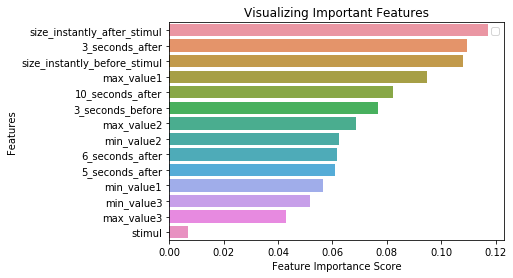

In [16]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()